# Data Handling and Visualization

In [1]:
import math
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Load and preprocess data
def load_and_preprocess_data(filepath):
    df = pd.read_csv(filepath)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.drop(columns='station', inplace=True)
    df['year'] = df['datetime'].dt.year
    df.rename(columns={'tre200h0': 'air_temp',
                         'ure200h0': 'rh',
                         'rre150h0': 'precip',
                         'dkl010h0': 'wind_direction',
                         'fkl010h0': 'wind_speed',
                         'fkl010h1': 'gust_peak'}, inplace=True)
    
    return df

station_data = load_and_preprocess_data('./data/PAY.csv')
station_data.to_csv('./data/Station_data.csv', index=False)

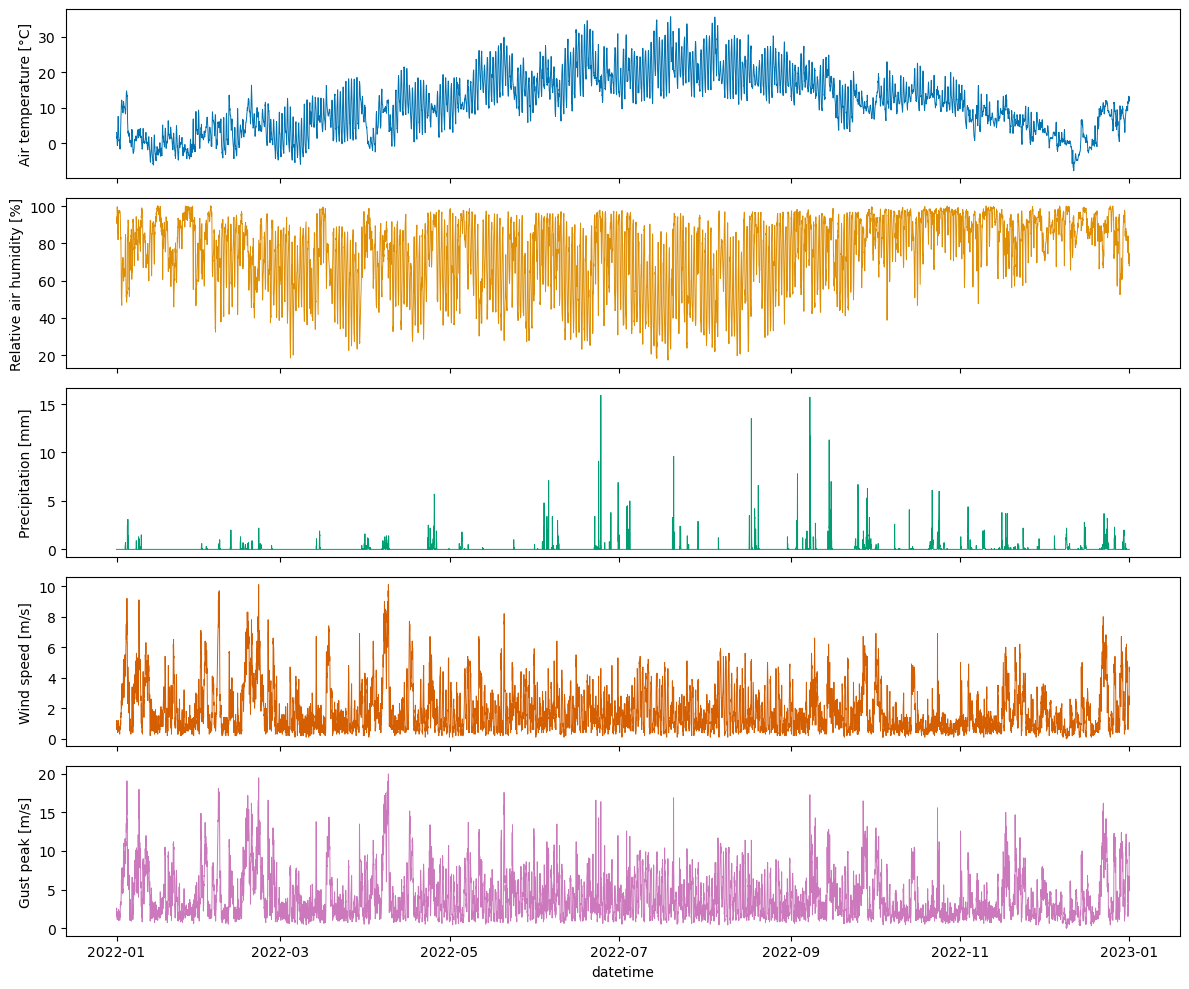

In [2]:
def plot_data(df):
    # Filter out 'datetime' and 'year' columns from the plotting
    plot_columns = [col for col in df.columns if col not in ['datetime', 'year', 'wind_direction']]

    # Titles for the subplots
    y_labels = ['Air temperature [°C]', 
                'Relative air humidity [%]',
                'Precipitation [mm]', 
                'Wind speed [m/s]', 
                'Gust peak [m/s]']

    # Determine the number of rows for subplots
    n_rows = len(plot_columns)

    # Create a figure and a set of subplots
    fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10), squeeze=False, sharex=True)
    axes = axes.flatten()

    # Set a color palette
    palette = sns.color_palette("colorblind", n_rows)

    for ax, col, label, color in zip(axes, plot_columns, y_labels, palette):
        
        # Use Seaborn's lineplot for plotting with the specified color
        sns.lineplot(x=df['datetime'], y=df[col], ax=ax, color=color, linewidth=0.7)
        ax.set_ylabel(label)

    plt.tight_layout()
    plt.savefig('./figures/data_overview.pdf', dpi=300, bbox_inches='tight')
    plt.show()

plot_data(station_data.query('year == 2022'))

In [3]:
def load_and_preprocess_qpe_data(filepath, drop_columns):
    df = pd.read_csv(filepath)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.drop(columns=drop_columns, inplace=True)
    df.rename(columns={'rre150h0': 'precip'}, inplace = True)
    df['year'] = df['datetime'].dt.year
    
    # Remove rows with NaN values for AQC
    df = df[~df['aqc'].isna()]
    
    return df

qpe_2016 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2016.csv', 
                                        ['Unnamed: 0', 'station', 'fkl010h0', 'fkl010h1', 'tre200h0', 'ure200h0', 'dkl010h0'])
qpe_2017 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2017.csv', 
                                        ['Unnamed: 0', 'station', 'fkl010h0', 'fkl010h1', 'tre200h0', 'ure200h0', 'dkl010h0'])
qpe_2018 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2018.csv', 
                                        ['Unnamed: 0', 'station', 'fkl010h0', 'fkl010h1', 'tre200h0', 'ure200h0', 'dkl010h0'])
qpe_2019 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2019.csv', 
                                        ['Unnamed: 0', 'station', 'fkl010h0', 'fkl010h1', 'tre200h0', 'ure200h0', 'dkl010h0'])
qpe_2020 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2020.csv', 
                                        ['Unnamed: 0', 'station', 'fkl010h0', 'fkl010h1', 'tre200h0', 'ure200h0', 'dkl010h0'])
qpe_2021 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2021.csv', 
                                        ['Unnamed: 0', 'station', 'fkl010h0', 'fkl010h1', 'tre200h0', 'ure200h0', 'dkl010h0'])
qpe_2022 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2022.csv', 
                                        ['Unnamed: 0', 'station', 'fkl010h0', 'fkl010h1', 'tre200h0', 'ure200h0', 'dkl010h0'])
qpe_2023 = load_and_preprocess_qpe_data('./data/QPEdata_PAY_2023.csv', 
                                        ['Unnamed: 0', 'station', 'fu301h0', 'fu301h1', 'tre200h0', 'ure200h0', 'dkl010h0'])

qpe = pd.concat([qpe_2016, qpe_2017, qpe_2018, qpe_2019, qpe_2020, qpe_2021, qpe_2022, qpe_2023])
qpe.to_csv('./data/QPE.csv', index =False)

qpe.head()

,aqc,cpc,cpccv,datetime,precip,year
1,0.000104,0.0,0.0,2016-01-01 01:00:00,0.0,2016
2,0.000104,0.0,0.0,2016-01-01 02:00:00,0.0,2016
3,0.000104,0.0,0.0,2016-01-01 03:00:00,0.0,2016
4,0.000104,0.0,0.0,2016-01-01 04:00:00,0.0,2016
5,0.000104,0.0,0.0,2016-01-01 05:00:00,0.0,2016


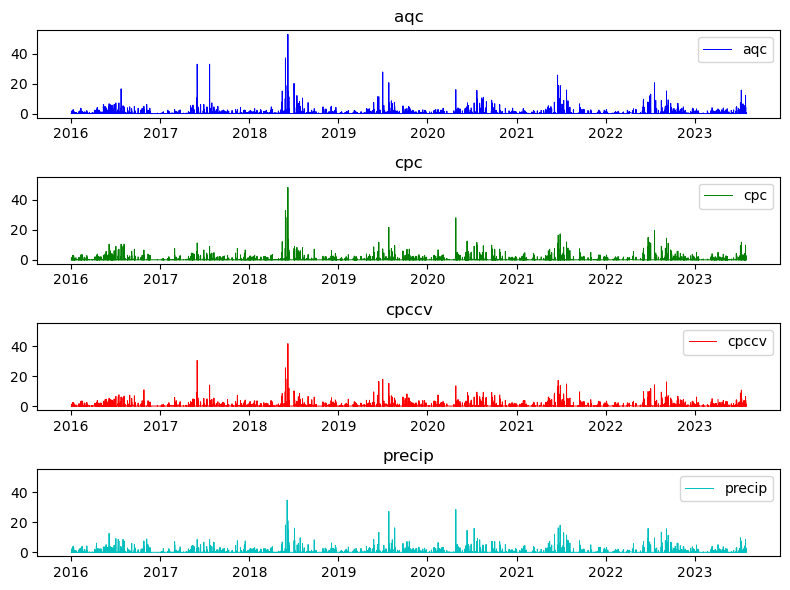

In [4]:
def plot_qpe(df):
    # Filter out 'datetime' and 'year' columns from the plotting
    plot_columns = [col for col in df.columns if col not in ['datetime', 'year']]

    # Determine the number of rows for subplots
    n_rows = len(plot_columns)

    fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(8, 6), sharey=True)
    axes = axes.flatten()

    colors = ['b', 'g', 'r', 'c']

    for ax, (col, color) in zip(axes, zip(plot_columns, colors)):
        ax.plot(df['datetime'], df[col], color=color, linewidth=0.7)
        ax.set_title(col)
        ax.legend([col], loc='upper right')

    plt.tight_layout()
    plt.show()

plot_qpe(qpe)